In [1]:
using Multitaper
include("2DRectangle.jl")

using Plots
pyplot()

using FFTW

In [2]:
nslep = 6
n = 128
m = 128
Kp = 12.0
N = 32
M = 32
verbose = true
@time R = rectsleps(nslep, n, m, Kp, N, M; verbose=true)

The 6 concentrations:
0.9999999940054248
0.9999997895671868
0.9999997895671859
0.9999979410202485
0.9999945960831169
0.9999933413537555
318.107575 seconds (304.74 M allocations: 798.269 GiB, 34.72% gc time)


6-element Array{Array{Float64,2},1}:
 [-2.3825050291974205e-6 -2.4969404329430885e-6 … -2.496940431154503e-6 -2.3825050220769685e-6; -2.496940432889909e-6 -2.573586730116316e-6 … -2.5735867318291314e-6 -2.4969404294641997e-6; … ; -2.496940430924515e-6 -2.57358673172505e-6 … -2.5735867139762667e-6 -2.496940409928926e-6; -2.3825050217402708e-6 -2.496940429258827e-6 … -2.4969404098998896e-6 -2.3825049993486926e-6]
 [-7.740986657669624e-6 -5.9732154533734355e-6 … -3.6702461854086096e-7 7.620308462705505e-8; -5.981600006119776e-6 -4.208631901475259e-6 … 4.143023440110787e-8 4.847090971096021e-7; … ; -4.847090295459383e-7 -4.143016060590237e-8 … 4.208631851030154e-6 5.98159996159917e-6; -7.620302476686161e-8 3.670246861030946e-7 … 5.97321540885287e-6 7.740986620198443e-6]
 [7.620305483322777e-8 4.847090635629918e-7 … 5.981599982048976e-6 7.740986637007527e-6; -3.6702465218521815e-7 4.143019772993163e-8 … 4.208631874570985e-6 5.973215429287529e-6; … ; -5.973215430935943e-6 -4.20863187627692e-

In [3]:
# Regions of concentration in space and spectrum 
xy = hcat(collect(LinRange(-1,1,20)),ones(20))
xy = vcat(xy,hcat(ones(20),collect(LinRange(1,-1,20))))
xy = vcat(xy,hcat(collect(LinRange(-1,1,20)),-ones(20)))
xy = vcat(xy,hcat(-ones(20),collect(LinRange(-1,1,20))))
#plot(xy[:,1],xy[:,2])

t = LinRange(0,2*pi,80)
x = sqrt(12.0)*cos.(t)
y = sqrt(12.0)*sin.(t)
# plot(x,y)

80-element Array{Float64,1}:
  0.0
  0.27522345172968
  0.5487068521836628
  0.8187211512506615
  1.0835592315953064
  1.341546701603581
  1.59105248142571
  1.8304991151881302
  2.058372744177418
  2.273232677942491
  2.473720502803504
  2.6585686701804976
  2.8266085104436383
  ⋮
 -2.6585686701804967
 -2.4737205028035043
 -2.2732326779424934
 -2.058372744177417
 -1.8304991151881316
 -1.5910524814257103
 -1.3415467016035831
 -1.083559231595308
 -0.818721151250662
 -0.5487068521836654
 -0.2752234517296787
 -8.484601909799254e-16

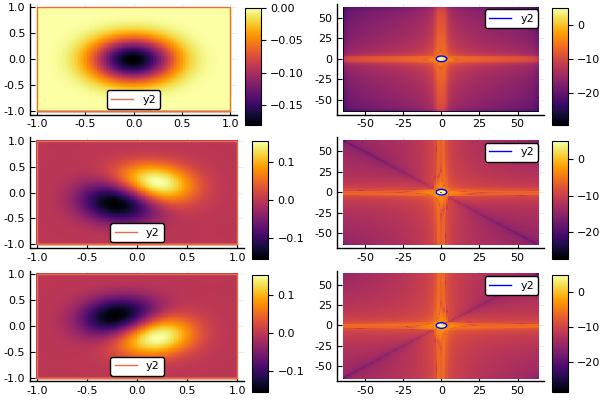

In [4]:
circ = map(y->abs2.(fftshift(fft(R[y]))),1:nslep)

n2 = Int64(n/2)
m2 = Int64(m/2)

q1 = heatmap(LinRange(-1,1,128),LinRange(-1,1,128),R[1])
q1 = plot!(xy[:,1],xy[:,2])
q2 = heatmap(collect(-n2:(n2-1)),collect(-m2:(m2-1)),log10.(circ[1]))
q2 = plot!(x,y,c=:blue)

q3 = heatmap(LinRange(-1,1,128),LinRange(-1,1,128),R[2])
q3 = plot!(xy[:,1],xy[:,2])
q4 = heatmap(collect(-n2:(n2-1)),collect(-m2:(m2-1)),log10.(circ[2]))
q4 = plot!(x,y,c=:blue)

q5 = heatmap(LinRange(-1,1,128),LinRange(-1,1,128),R[3])
q5 = plot!(xy[:,1],xy[:,2])
q6 = heatmap(collect(-n2:(n2-1)),collect(-m2:(m2-1)),log10.(circ[3]))
q6 = plot!(x,y,c=:blue)

plot(q1, q2, q3, q4, q5, q6, layout=(3,2))

In [5]:
png("rectsleps_1-3")

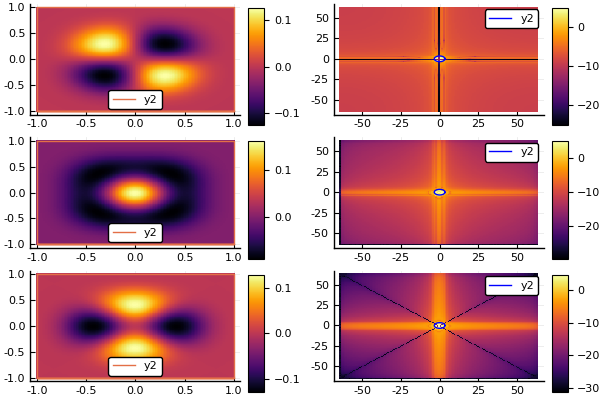

In [6]:
q1 = heatmap(LinRange(-1,1,128),LinRange(-1,1,128),R[4])
q1 = plot!(xy[:,1],xy[:,2])
q2 = heatmap(collect(-n2:(n2-1)),collect(-m2:(m2-1)),log10.(circ[4]))
q2 = plot!(x,y,c=:blue)

q3 = heatmap(LinRange(-1,1,128),LinRange(-1,1,128),R[5])
q3 = plot!(xy[:,1],xy[:,2])
q4 = heatmap(collect(-n2:(n2-1)),collect(-m2:(m2-1)),log10.(circ[5]))
q4 = plot!(x,y,c=:blue)

q5 = heatmap(LinRange(-1,1,128),LinRange(-1,1,128),R[6])
q5 = plot!(xy[:,1],xy[:,2])
q6 = heatmap(collect(-n2:(n2-1)),collect(-m2:(m2-1)),log10.(circ[6]))
q6 = plot!(x,y,c=:blue)

plot(q1, q2, q3, q4, q5, q6, layout=(3,2))

In [7]:
png("rectsleps_4-6")

Can I improve the appearance of this by increasing the numerical integration resolution? No

In [8]:
N = 64
M = 64
@time Rnew = rectsleps(1, n, m, Kp, N, M; verbose=true)

The 1 concentrations:
0.9999999940054193
649.140993 seconds (302.00 M allocations: 2.020 TiB, 30.14% gc time)


1-element Array{Array{Float64,2},1}:
 [1.2002894185563072e-6 1.2579473194013522e-6 … 1.2579473209419783e-6 1.2002894215518981e-6; 1.25794731950491e-6 1.2965700755732884e-6 … 1.2965700761735097e-6 1.2579473215265789e-6; … ; 1.2579473220541345e-6 1.296570076888863e-6 … 1.2965700812427827e-6 1.2579473274678943e-6; 1.2002894230505916e-6 1.2579473226229247e-6 … 1.2579473275558958e-6 1.2002894289965414e-6]

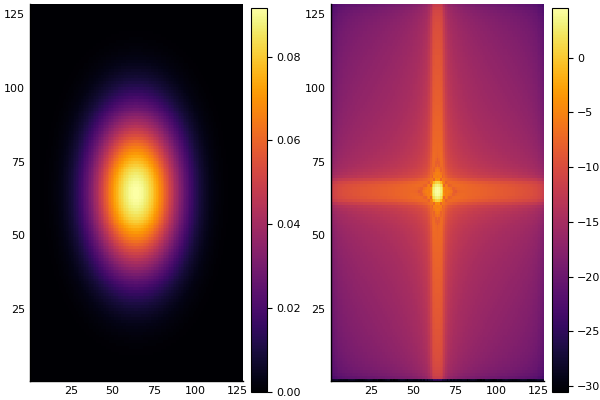

In [9]:
p1 = heatmap(Rnew[1])
circ_new = abs2.(fftshift(fft(Rnew[1])))

p2 = heatmap(log10.(circ_new))
plot(p1, p2, layout=(1,2))